In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from unbalanced_cv import get_fold
from sklearn.neighbors import KNeighborsClassifier

import networkx as nx
import data_analysis_func as func

#colorize images
import misc
import data_analysis_func as func

# Parameters

In [35]:
#"Properties Index" - Properties to be validated
# [1 = Shapes], [2 = Network], [3 = All], [5 = Degree]

r = 350                                # Radius to be analized
number_classes = 2                     # Number of classes in the dataset
number_folds = 5                       # Number of Folds

#k = 3                                  # Number of neighbors for the k-nearest neighbors classifier
#k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 80, 90, 100, 150, 200, 250, 300]
k = np.array(range(1,30))

image_names = ['3', 'S07_46186 10X_20151028_59']

#image_names = ['3', 
#               'S07_40805_upper_10X_Snapshot_20151028_54_region_01', 
#               'S07_41755_upper_10X_Snapshot_20151028_44_region_02', 
#               'S07_41755_upper_10X_Snapshot_20151028_44_region_03', 
#               'S07_41755_upper_10X_Snapshot_20151028_44_region_04', 
#               'S07_42991_lower_10X_Snapshot_20151028_47_region_08', 
#               'S07_46186 10X_20151028_59']

confusion_matrices = []
for name in image_names:
    p = 'prostate_marked/' + name + '/results_radius_' + str(r) + '/'
    graph = nx.read_gml(p + 'grafo_glands_properties_' + str(r) + 'r.gml', label='id')
    
    print("Image: " + name)
    g_nodes, g_nodes_demarcated = func.display_gland_numbers(graph)
    print("")
    
    N = len(g_nodes) + len(g_nodes_demarcated)
    predicted_classes = np.full(N, -1)          # Will store the classes predicted by the classifier
    
    confusion_matrix = {
    "Image Name": name,
    "Radius": r,
    "Path": p,
    "Path Mask RGB": 'prostate_marked/' + name + '/MASK - RGB.png',
    "Mask RGB": None,
    "Path Result Class Color": p + '/results_colorize/img_colored_two_classes.png',
    "Graph": graph,
    "Health Nodes": g_nodes,
    "Unhealth Nodes": g_nodes_demarcated,
    "Properties To Analyze": [
        {
            "K": k,
            "Number of Classes": number_classes,
            "Number of Folds": number_folds,
            "Properties Index": 1,
            "Properties Description": "Shapes",
            "Properties Names": ['area', 'diameter', 'perimeter', 'eccentricity', 'solidity'],
            "Table of Properites Normalized": None,
            "Classes": None,
            "Classes Predicted": predicted_classes.copy(),
            "Tested Indexes": None,
            "Confusion Matrix K": [],
            "Confusion Matrix":
                {
                    "Data": None,
                    "Precision": None,
                    "Recall": None,
                    "Specificity": None,
                    "Accuracy": None
                }
        },
        {
            "K": k,
            "Number of Classes": number_classes,
            "Number of Folds": number_folds,
            "Properties Index": 2,
            "Properties Description": "Network",
            "Properties Names": ['degree', 'betweenness', 'strength'],
            "Table of Properites Normalized": None,
            "Accuracy": None,
            "Classes": None,
            "Classes Predicted": predicted_classes.copy(),
            "Tested Indexes": None,
            "Confusion Matrix K": [],
            "Confusion Matrix":
                {
                    "Data": None,
                    "Precision": None,
                    "Recall": None,
                    "Specificity": None,
                    "Accuracy": None
                }
        },
        {
            "K": k,
            "Number of Classes": number_classes,
            "Number of Folds": number_folds,
            "Properties Index": 3,
            "Properties Description": "All",
            "Properties Names": ['area', 'diameter', 'perimeter', 'eccentricity', 'solidity', 'degree', 'betweenness', 'strength'],
            "Table of Properites Normalized": None,
            "Classes": None,
            "Classes Predicted": predicted_classes.copy(),
            "Tested Indexes": None,
            "Confusion Matrix K": [],
            "Confusion Matrix":
                {
                    "Data": None,
                    "Precision": None,
                    "Recall": None,
                    "Specificity": None,
                    "Accuracy": None
                }
        },
        {
            "K": k,
            "Number of Classes": number_classes,
            "Number of Folds": number_folds,
            "Properties Index": 5,
            "Properties Description": "Network Degree",
            "Properties Names": ['degree'],
            "Table of Properites Normalized": None,
            "Classes": None,
            "Classes Predicted": predicted_classes.copy(),
            "Tested Indexes": None,
            "Confusion Matrix K": [],
            "Confusion Matrix":
                {
                    "Data": None,
                    "Precision": None,
                    "Recall": None,
                    "Specificity": None,
                    "Accuracy": None
                }
        },
    ]
    }
    
    confusion_matrices.append(confusion_matrix)

Image: 3
Number of NORMAL glands:  1788
Number of DEMARCATED glands:  327

Image: S07_46186 10X_20151028_59
Number of NORMAL glands:  2240
Number of DEMARCATED glands:  1124



In [36]:
k = np.array(range(1,30))
print(k)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


# Visualize Mask Glands

prostate_marked/3/MASK - RGB.png
prostate_marked/S07_46186 10X_20151028_59/MASK - RGB.png


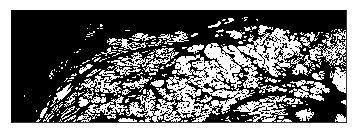

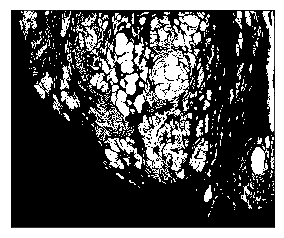

In [37]:
for matrix in confusion_matrices:
    print(matrix["Path Mask RGB"])

    img = 255-(255*plt.imread(matrix["Path Mask RGB"])[:,:,0]).astype(np.uint8)
    misc.show_img(img)
    matrix["Mask RGB"] = img.copy()

# Measure Results in each properties group

In [38]:
print_confusion_matrix = False
print_values = False

for matrix in confusion_matrices:
    
    for prop in matrix["Properties To Analyze"]:
        
        for k_i in k:
            table_prop_norm, c = func.get_table_properties(matrix["Graph"], prop["Properties Names"], True)
            prop["Table of Properites Normalized"] = table_prop_norm
            prop["Classes"] = c


            list_test_index = []
            list_classes_pred = []

            N = len(matrix["Health Nodes"]) + len(matrix["Unhealth Nodes"])

            fold_idx = 0
            for data_train, classes_train, data_test, classes_test, test_indices in get_fold(table_prop_norm, c, prop["Number of Folds"]):
                fold_idx += 1
                list_test_index.extend(test_indices)

                # Train classifier using data_train, classes_train
                knn = KNeighborsClassifier(n_neighbors=k_i)
                knn.fit(data_train, classes_train)

                # Test classifier using data_test, classes_test
                pred = knn.predict(data_test)
                list_classes_pred.append(pred)

                # Save predictions
                prop["Classes Predicted"][test_indices] = pred
                prop["Tested Indexes"] = list_test_index


            # Measurements
            position, class_colors, confusion_matrix = func.get_colors_by_pred_results_test_indices(matrix["Graph"], prop["Classes Predicted"], prop["Tested Indexes"])

            
            print("------")
            print("K = " + str(k_i))
            print("------")
            print(matrix["Image Name"])
            print('----------------------------------------------')
            print(prop["Properties Description"])
            print('----------------------------------------------')
            
            if print_confusion_matrix:
                print('         +---------------------------------+')
                print('         |  Health Class  | Unhealth Class |')
                print('         +---------------------------------+')
                print('  Health |      ' + "{:04d}".format(confusion_matrix[0][0]) + '      |       ' + "{:04d}".format(confusion_matrix[0][1]) + '     |')
                print('         +---------------------------------+')
                print('Unhealth |      ' + "{:04d}".format(confusion_matrix[1][0]) + '      |       ' + "{:04d}".format(confusion_matrix[1][1]) + '     |')
                print('         +---------------------------------+')

            tn = confusion_matrix[0][0]
            fp = confusion_matrix[0][1]
            fn = confusion_matrix[1][0]
            tp = confusion_matrix[1][1]

            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            true_negative_rate = tn / (tn + fp)
            accuracy = (tp + tn) / (tp + tn + fp + fn)

            if print_values:
                print('Precision: ' + "{:3.4f}".format(precision))
                print('Recall: ' + "{:3.4f}".format(recall))
                print('Specificity: ' + "{:3.4f}".format(true_negative_rate))
                print('Accuracy: ' + "{:3.4f}".format(accuracy))
                print("")
                print("")

            prop["Confusion Matrix"]["Data"] = confusion_matrix.copy()
            prop["Confusion Matrix"]["Precision"] = precision
            prop["Confusion Matrix"]["Recall"] = recall
            prop["Confusion Matrix"]["Specificity"] = true_negative_rate
            prop["Confusion Matrix"]["Accuracy"] = accuracy
            
            prop["Confusion Matrix K"].append({ "k": k_i, "Confusion Matrix": prop["Confusion Matrix"].copy() } )



------
K = 1
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 2
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 3
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 4
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 5
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 6
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 7
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 8
------
3
----------------------------------------------
Shapes
----------------------------------------------
------
K = 9
---

------
K = 10
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 11
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 12
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 13
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 14
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 15
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 16
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 17
------
3
----------------------------------------------
All
----------------------------------------------
------
K = 18
------
3
---------

------
K = 16
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
----------------------------------------------
------
K = 17
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
----------------------------------------------
------
K = 18
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
----------------------------------------------
------
K = 19
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
----------------------------------------------
------
K = 20
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
----------------------------------------------
------
K = 21
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
----------------------------------------------
------
K = 22
------
S07_46186 10X_20151028_59
----------------------------------------------
Shapes
-----------

------
K = 14
------
S07_46186 10X_20151028_59
----------------------------------------------
All
----------------------------------------------
------
K = 15
------
S07_46186 10X_20151028_59
----------------------------------------------
All
----------------------------------------------
------
K = 16
------
S07_46186 10X_20151028_59
----------------------------------------------
All
----------------------------------------------
------
K = 17
------
S07_46186 10X_20151028_59
----------------------------------------------
All
----------------------------------------------
------
K = 18
------
S07_46186 10X_20151028_59
----------------------------------------------
All
----------------------------------------------
------
K = 19
------
S07_46186 10X_20151028_59
----------------------------------------------
All
----------------------------------------------
------
K = 20
------
S07_46186 10X_20151028_59
----------------------------------------------
All
--------------------------------

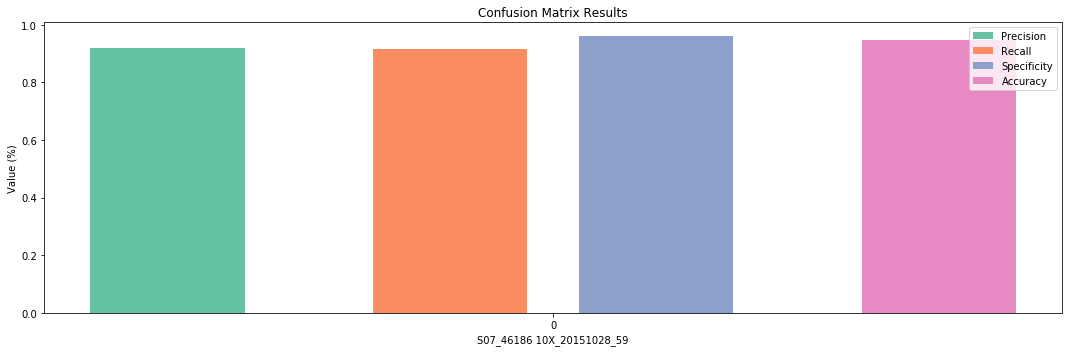

In [39]:
x = np.arange(1)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))

rects3 = ax.bar(x - (2.5*width), precision, width, label='Precision', color= ( np.array((102,194,165)) / 255 ) )
rects1 = ax.bar(x - width/1.5, recall, width, label='Recall', color= ( np.array((252,141,98)) / 255 ))

rects2 = ax.bar(x + width/1.5, true_negative_rate, width, label='Specificity', color= ( np.array((141,160,203)) / 255 ))
rects4 = ax.bar(x + (2.5*width), accuracy, width, label='Accuracy', color= ( np.array((231,138,195)) / 255 ))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value (%)')
ax.set_title('Confusion Matrix Results')
ax.set_xticks(x)
ax.set_xlabel(confusion_matrices[1]["Image Name"])
ax.legend()


fig.tight_layout()

plt.savefig(confusion_matrices[1]["Path"] + 'confusion_matrix.png', dpi=300)
plt.show()



In [40]:
data_confusion_matrix = {}
for p in ["Shapes", "Network", "All", "Network Degree"]:
    data_confusion_matrix[p] = { 
            "Precision": [],
            "Recall": [],
            "Specificity": [],
            "Accuracy": []
        }

for matrix in confusion_matrices:
    
    img_name    = confusion_matrices[0]["Image Name"]
    
    i = 1
    
    for prop in matrix["Properties To Analyze"]:
        data_cm = data_confusion_matrix[prop["Properties Description"]]
        
        data_cm["Precision"].append( prop["Confusion Matrix"]["Precision"] )
        data_cm["Recall"].append( prop["Confusion Matrix"]["Recall"] )
        data_cm["Specificity"].append( prop["Confusion Matrix"]["Specificity"] )
        data_cm["Accuracy"].append( prop["Confusion Matrix"]["Accuracy"] )


print(data_confusion_matrix)


{'Shapes': {'Precision': [0.25828460038986356, 0.48611867174741424], 'Recall': [0.8103975535168195, 0.7944839857651246], 'Specificity': [0.5743847874720358, 0.5785714285714286], 'Accuracy': [0.6108747044917258, 0.6507134363852557]}, 'Network': {'Precision': [0.7035398230088495, 0.9164420485175202], 'Recall': [0.9724770642201835, 0.9074733096085409], 'Specificity': [0.9250559284116331, 0.9584821428571428], 'Accuracy': [0.932387706855792, 0.9414387633769322]}, 'All': {'Precision': [0.6875, 0.9165170556552962], 'Recall': [0.9755351681957186, 0.9083629893238434], 'Specificity': [0.918903803131991, 0.9584821428571428], 'Accuracy': [0.9276595744680851, 0.9417360285374554]}, 'Network Degree': {'Precision': [0.6809421841541756, 0.9204647006255585], 'Recall': [0.9724770642201835, 0.9163701067615658], 'Specificity': [0.9166666666666666, 0.9602678571428571], 'Accuracy': [0.9252955082742317, 0.9456004756242569]}}


OSError: [Errno 22] Invalid argument: 'prostate_marked/results_KNN_k_[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24\n 25 26 27 28 29].pdf'

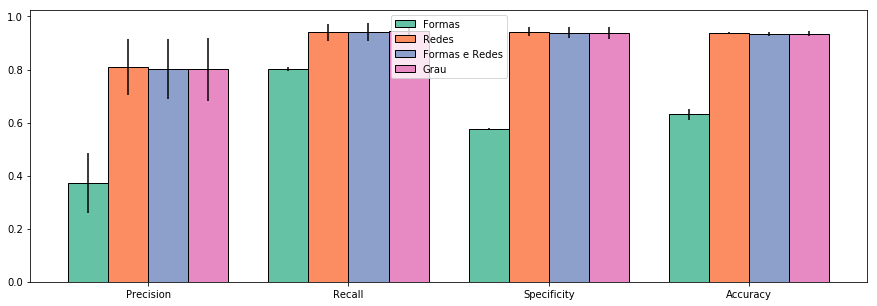

In [41]:
dx = 0.1 #distance between each set of 4 bars, wich is 2 * dx
bw = (1 - 2 * dx) / 4 # width of each bin
bw2 = bw / 2

colors = [np.array((102,194,165)) / 255, np.array((252,141,98)) / 255, 
        np.array((141,160,203)) / 255, np.array((231,138,195)) / 255]

fig, ax = plt.subplots(figsize=(15,5))

for meas_idx, (meas_keys, meas_values) in enumerate(data_confusion_matrix.items()):
    for perf_idx, (perf_keys, perf_values) in enumerate(meas_values.items()):
        
        avg = np.mean(perf_values)
        std_dev = np.std(perf_values)
        
        if perf_idx == 0:
            label = meas_keys
        else:
            label = None
        
        if label == 'Shapes':
            label = 'Formas'
        elif label == 'Network':
            label = 'Redes'
        elif label == 'All':
            label = 'Formas e Redes'
        elif label == 'Network Degree':
            label = 'Grau'
            
        x = perf_idx + dx + bw2 + meas_idx * bw
        bar = plt.bar(x, avg, yerr=std_dev, width = bw, label = label, color = colors[meas_idx], edgecolor = 'k')

plt.legend()
ax.set_xticks(np.arange(.5, 4, 1))
ax.set_xticklabels(list( list(data_confusion_matrix.values())[0].keys() ))

plt.savefig('prostate_marked/results_KNN_k_' + str(k) + '.pdf', dpi=300)

In [ ]:
for meas_idx, (meas_keys, meas_values) in enumerate(data_confusion_matrix.items()):
    print(meas_keys)
    print('Accuracy' + str(meas_values['Accuracy']))
    print('Images' + str(image_names))
    print('Avg[' + str(np.mean(meas_values['Accuracy'])) + ']')
    print('StdDev[' + str(np.std(meas_values['Accuracy'])) + ']')
    print('----')
    print('Precision' + str(meas_values['Precision']))
    print('Images' + str(image_names))
    print('Avg[' + str(np.mean(meas_values['Precision'])) + ']')
    print('StdDev[' + str(np.std(meas_values['Precision'])) + ']')
    print('----')
    print('Recall' + str(meas_values['Recall']))
    print('Images' + str(image_names))
    print('Avg[' + str(np.mean(meas_values['Recall'])) + ']')
    print('StdDev[' + str(np.std(meas_values['Recall'])) + ']')
    print('----')
    print('Specificity' + str(meas_values['Specificity']))
    print('Images' + str(image_names))
    print('Avg[' + str(np.mean(meas_values['Specificity'])) + ']')
    print('StdDev[' + str(np.std(meas_values['Specificity'])) + ']')
    print('----')
        
    print('')
    print('')
    print('')
    print('')

3
S07_46186 10X_20151028_59


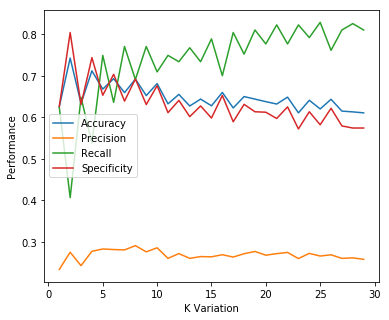

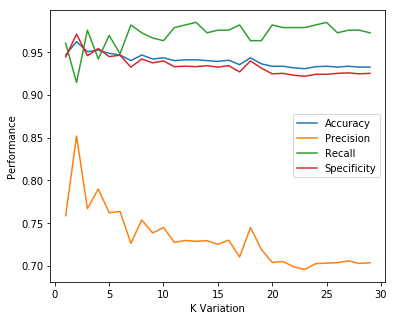

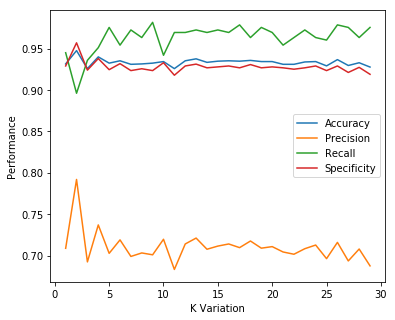

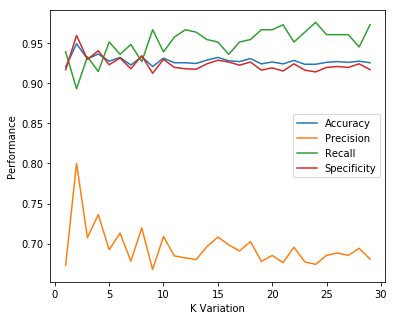

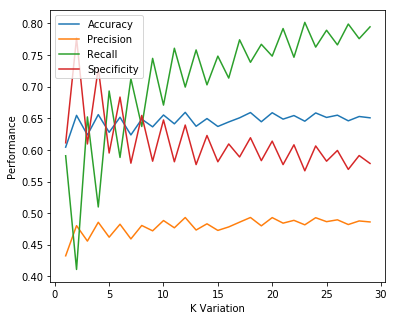

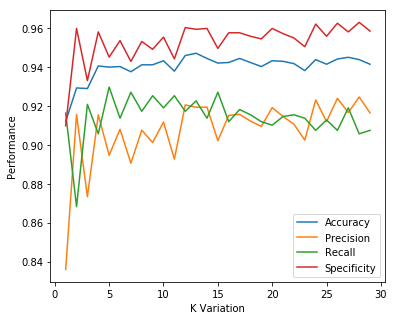

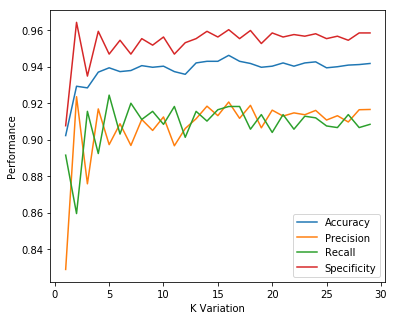

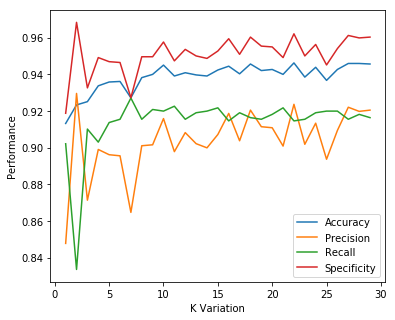

In [45]:

i = 0
for matrix in confusion_matrices:
    print(matrix["Image Name"])

    for prop in matrix["Properties To Analyze"]:
        #print('----------------------------------------------')
        #print(prop["Properties Description"])
        #print('----------------------------------------------')
        
        i = 0
        y_accuracy = []
        y_precision = []
        y_recall = []
        y_specificity = []
        
        for matrix_k in prop["Confusion Matrix K"]:
            y_accuracy.append(matrix_k["Confusion Matrix"]["Accuracy"])
            y_precision.append(matrix_k["Confusion Matrix"]["Precision"])
            y_recall.append(matrix_k["Confusion Matrix"]["Recall"])
            y_specificity.append(matrix_k["Confusion Matrix"]["Specificity"])
            
        fig = plt.figure(figsize=(6, 5))

        plt.plot(k, y_accuracy, label = "Accuracy")
        plt.plot(k, y_precision, label = "Precision")
        plt.plot(k, y_recall, label = "Recall")
        plt.plot(k, y_specificity, label = "Specificity")

        #plt.locator_params(axis='x', nbins=1)

        plt.xlabel('K Variation')
        plt.ylabel('Performance')

        #plt.ylim((0,1.1))

        plt.legend()

        plt.savefig('prostate_marked/results_img_' + str(matrix["Image Name"]) + '_prop_' + str(prop["Properties Description"]) + '.pdf', dpi=300)

        #print('prostate_marked/results_img_' + str(matrix["Image Name"]) + '_prop_' + str(prop["Properties Description"]) + '.pdf')



In [ ]:
#confusion_matrices[0]["Properties To Analyze"][0]["Confusion Matrix K"][0]["Confusion Matrix"]
len(k)